In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import json
from functools import reduce
from IPython.display import display

In [2]:
# Set DataFrame display option
pd.options.display.max_columns = None

In [3]:
year_list = ["2018", "2017", "2016", "2015", "2014"]

In [4]:
# Load movie data
for year in year_list:
    locals()[f"movies_{year}_df"] = pd.read_csv(f"data/movie_data_for_past_years/{year}_movies_data.csv", index_col=0)

In [5]:
print(movies_2018_df.shape)
print(movies_2017_df.shape)
print(movies_2016_df.shape)
print(movies_2015_df.shape)
print(movies_2014_df.shape)

(265, 25)
(274, 25)
(248, 25)
(384, 25)
(298, 25)


In [6]:
movies_2018_df.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,Insidious: The Last Key,2018,PG-13,05 Jan 2018,103 min,"Horror, Mystery, Thriller",Adam Robitel,"Leigh Whannell, Leigh Whannell (based on chara...","Lin Shaye, Leigh Whannell, Angus Sampson, Kirk...",Parapsychologist Dr. Elise Rainier faces her m...,English,"Canada, USA",NaN,https://m.media-amazon.com/images/M/MV5BMTUxOD...,"[{'Source': 'Internet Movie Database', 'Value'...",49.0,5.7,"39,308",tt5726086,movie,03 Apr 2018,"$29,581,355",Universal Pictures,http://www.insidiousmovie.com/,True
1,The Strange Ones,2017,R,05 Jan 2018,81 min,"Drama, Thriller","Christopher Radcliff, Lauren Wolkstein","Christopher Radcliff (story), Christopher Radc...","Alex Pettyfer, James Freedson-Jackson, Emily A...",Mysterious events surround two travelers as th...,English,USA,4 wins & 7 nominations.,https://m.media-amazon.com/images/M/MV5BMTkzMW...,"[{'Source': 'Internet Movie Database', 'Value'...",57.0,5.0,"1,806",tt6014904,movie,24 Apr 2018,NaN,Vertical Entertainment and DIRECTV,http://www.thestrangeones.com,True
2,Stratton,2017,R,05 Jan 2018,95 min,"Action, Thriller",Simon West,"Duncan Falconer (based on the novel by), Warre...","Dominic Cooper, Austin Stowell, Gemma Chan, Co...",A British Special Boat Service commando tracks...,English,UK,NaN,https://m.media-amazon.com/images/M/MV5BYzk4Mz...,"[{'Source': 'Internet Movie Database', 'Value'...",26.0,4.8,"3,265",tt3567666,movie,06 Feb 2018,NaN,SquareOne Entertainment,NaN,True
3,Sweet Country,2017,R,06 Apr 2018,113 min,"Adventure, Crime, Drama, History, Thriller",Warwick Thornton,"Steven McGregor, David Tranter","Bryan Brown, Luka Magdeline Cole, Shanika Cole...",Australian western set on the Northern Territo...,"English, Aboriginal",Australia,5 wins & 8 nominations.,https://m.media-amazon.com/images/M/MV5BNDhkMz...,"[{'Source': 'Internet Movie Database', 'Value'...",87.0,6.9,"4,804",tt6958212,movie,NaN,NaN,Samuel Goldwyn Films,NaN,True
4,The Commuter,2018,PG-13,12 Jan 2018,105 min,"Action, Crime, Drama, Mystery, Thriller",Jaume Collet-Serra,"Byron Willinger (story by), Philip de Blasi (s...","Liam Neeson, Vera Farmiga, Patrick Wilson, Jon...",An Insurance Salesman/Ex-Cop is caught up in a...,"English, Spanish","France, USA",NaN,https://m.media-amazon.com/images/M/MV5BMTc0ND...,"[{'Source': 'Internet Movie Database', 'Value'...",56.0,6.3,"77,465",tt1590193,movie,17 Apr 2018,"$36,241,300",Lionsgate,https://www.thecommuter.movie/,True


In [7]:
movies_2018_df.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response'],
      dtype='object')

In [8]:
## Data cleaning

# Drop all of the rows with NA values
movies_2018_df = movies_2018_df.dropna(subset=["Title", "Director", "Actors", "BoxOffice"])
movies_2018_df = movies_2018_df.reset_index(drop=True)

movies_2017_df = movies_2017_df.dropna(subset=["Title", "Director", "Actors", "BoxOffice"])
movies_2017_df = movies_2017_df.reset_index(drop=True)

movies_2016_df = movies_2016_df.dropna(subset=["Title", "Director", "Actors", "BoxOffice"])
movies_2016_df = movies_2016_df.reset_index(drop=True)

movies_2015_df = movies_2015_df.dropna(subset=["Title", "Director", "Actors", "BoxOffice"])
movies_2015_df = movies_2015_df.reset_index(drop=True)

movies_2014_df = movies_2014_df.dropna(subset=["Title", "Director", "Actors", "BoxOffice"])
movies_2014_df = movies_2014_df.reset_index(drop=True)

In [9]:
print(movies_2018_df.shape)
print(movies_2017_df.shape)
print(movies_2016_df.shape)
print(movies_2015_df.shape)
print(movies_2014_df.shape)

(24, 25)
(196, 25)
(171, 25)
(159, 25)
(148, 25)


In [10]:
movie_df_list = [
    movies_2018_df,
    movies_2017_df,
    movies_2016_df,
    movies_2015_df,
    movies_2014_df,
]

In [11]:
for i in range(0, len(year_list)):
    dict_temp = {}
    for row in range(0, len(movie_df_list[i])):
        actor_names = movie_df_list[i]["Actors"][row].split(",")
        for name in actor_names:
            name = name.strip()
            if name not in dict_temp.keys():
                dict_temp[name] = {f"master_pieces_{year_list[i]}": [], f"box_office_{year_list[i]}": []}
                dict_temp[name][f"master_pieces_{year_list[i]}"].append(movie_df_list[i]["Title"][row])
                dict_temp[name][f"box_office_{year_list[i]}"].append(movie_df_list[i]["BoxOffice"][row])
            else:
                dict_temp[name][f"master_pieces_{year_list[i]}"].append(movie_df_list[i]["Title"][row])
                dict_temp[name][f"box_office_{year_list[i]}"].append(movie_df_list[i]["BoxOffice"][row])
    #locals()[f"actor_bo_dict_{year_list[i]}"] = dict_temp
    locals()[f"actor_bo_df_{year_list[i]}"] = pd.DataFrame.from_dict(dict_temp, orient='index')

In [12]:
actor_bo_df_2018.index.name = "actor_name"
actor_bo_df_2017.index.name = "actor_name"
actor_bo_df_2016.index.name = "actor_name"
actor_bo_df_2015.index.name = "actor_name"
actor_bo_df_2014.index.name = "actor_name"

In [13]:
actor_bo_df_2018.head(10)

,master_pieces_2018,box_office_2018
actor_name,,
50 Cent,[Den of Thieves],"[$44,680,327]"
Abby Ryder Fortson,[Forever My Girl],"[$16,174,498]"
Agnieszka Grochowska,[In Darkness],"[$1,038,733]"
Alek Skarlatos,[The 15:17 to Paris],"[$35,003,216]"
Alex Roe,[Forever My Girl],"[$16,174,498]"
Aline Küppenheim,[A Fantastic Woman],"[$806,746]"
Angourie Rice,[Every Day],"[$5,260,834]"
Angus Sampson,[Insidious: The Last Key],"[$29,581,355]"
Anthony Sadler,[The 15:17 to Paris],"[$35,003,216]"


In [14]:
# Sort the DataFrame by total BoxOffice
def total_bo_calculator(x):
    total_sum = 0
    for num in x:
        num = num.replace("$", "")
        num = num.replace(",", "")
        num = float(num)
        total_sum += num
    
    return total_sum

In [15]:
actor_bo_df_2018["total_box_office_2018"] = actor_bo_df_2018["box_office_2018"].apply(total_bo_calculator)
actor_bo_df_2017["total_box_office_2017"] = actor_bo_df_2017["box_office_2017"].apply(total_bo_calculator)
actor_bo_df_2016["total_box_office_2016"] = actor_bo_df_2016["box_office_2016"].apply(total_bo_calculator)
actor_bo_df_2015["total_box_office_2015"] = actor_bo_df_2015["box_office_2015"].apply(total_bo_calculator)
actor_bo_df_2014["total_box_office_2014"] = actor_bo_df_2014["box_office_2014"].apply(total_bo_calculator)

In [16]:
actor_bo_df_2018.head()

,master_pieces_2018,box_office_2018,total_box_office_2018
actor_name,,,
50 Cent,[Den of Thieves],"[$44,680,327]",44680327.0
Abby Ryder Fortson,[Forever My Girl],"[$16,174,498]",16174498.0
Agnieszka Grochowska,[In Darkness],"[$1,038,733]",1038733.0
Alek Skarlatos,[The 15:17 to Paris],"[$35,003,216]",35003216.0
Alex Roe,[Forever My Girl],"[$16,174,498]",16174498.0


In [17]:
# 2018 Top BoxOffice actors
df_sorted_2018 = actor_bo_df_2018.sort_values(by=["total_box_office_2018"], ascending=False)
df_sorted_2018["total_box_office_2018"] = df_sorted_2018["total_box_office_2018"].map('${:,.0f}'.format)
df_sorted_2018.head(12)

,master_pieces_2018,box_office_2018,total_box_office_2018
actor_name,,,
Chris Evans,[Avengers: Infinity War],"[$664,987,816]","$664,987,816"
Robert Downey Jr.,[Avengers: Infinity War],"[$664,987,816]","$664,987,816"
Mark Ruffalo,[Avengers: Infinity War],"[$664,987,816]","$664,987,816"
Chris Hemsworth,[Avengers: Infinity War],"[$664,987,816]","$664,987,816"
Michael B. Jordan,[Black Panther],"[$501,105,037]","$501,105,037"
Chadwick Boseman,[Black Panther],"[$501,105,037]","$501,105,037"
Danai Gurira,[Black Panther],"[$501,105,037]","$501,105,037"
Lupita Nyong'o,[Black Panther],"[$501,105,037]","$501,105,037"
Linda Hamilton,[Terminator 2: Judgment Day],"[$198,116,802]","$198,116,802"


In [18]:
# 2017 Top BoxOffice actors
df_sorted_2017 = actor_bo_df_2017.sort_values(by=["total_box_office_2017"], ascending=False)
df_sorted_2017["total_box_office_2017"] = df_sorted_2017["total_box_office_2017"].map('${:,.0f}'.format)
df_sorted_2017.head(3)

,master_pieces_2017,box_office_2017,total_box_office_2017
actor_name,,,
Dwayne Johnson,"[The Fate of the Furious, Baywatch, Jumanji: W...","[$225,697,400, $58,009,442, $393,201,353]","$676,908,195"
Vin Diesel,"[xXx: Return of Xander Cage, The Fate of the F...","[$44,850,317, $225,697,400, $389,804,217]","$660,351,934"
Gal Gadot,"[Wonder Woman, Justice League]","[$412,400,625, $227,032,490]","$639,433,115"


In [19]:
# 2016 Top BoxOffice actors
df_sorted_2016 = actor_bo_df_2016.sort_values(by=["total_box_office_2016"], ascending=False)
df_sorted_2016["total_box_office_2016"] = df_sorted_2016["total_box_office_2016"].map('${:,.0f}'.format)
df_sorted_2016.head(3)

,master_pieces_2016,box_office_2016,total_box_office_2016
actor_name,,,
Jenny Slate,"[Zootopia, The Secret Life of Pets]","[$341,264,012, $368,305,960]","$709,569,972"
Idris Elba,"[Zootopia, The Jungle Book]","[$341,264,012, $363,995,937]","$705,259,949"
Scarlett Johansson,"[Captain America: Civil War, Sing]","[$408,080,554, $270,322,940]","$678,403,494"


In [20]:
# 2015 Top BoxOffice actors
df_sorted_2015 = actor_bo_df_2015.sort_values(by=["total_box_office_2015"], ascending=False)
df_sorted_2015["total_box_office_2015"] = df_sorted_2015["total_box_office_2015"].map('${:,.0f}'.format)
df_sorted_2015.head(5)

,master_pieces_2015,box_office_2015,total_box_office_2015
actor_name,,,
Chris Evans,"[Avengers: Age of Ultron, Fantastic Four]","[$429,113,729, $154,485,963]","$583,599,692"
Irrfan Khan,"[Piku, Jurassic World]","[$1,801,806, $528,757,749]","$530,559,555"
Vincent D'Onofrio,[Jurassic World],"[$528,757,749]","$528,757,749"
Chris Pratt,[Jurassic World],"[$528,757,749]","$528,757,749"
Bryce Dallas Howard,[Jurassic World],"[$528,757,749]","$528,757,749"


In [21]:
# 2014 Top BoxOffice actors
df_sorted_2014 = actor_bo_df_2014.sort_values(by=["total_box_office_2014"], ascending=False)
df_sorted_2014["total_box_office_2014"] = df_sorted_2014["total_box_office_2014"].map('${:,.0f}'.format)
df_sorted_2014.head(12)

,master_pieces_2014,box_office_2014,total_box_office_2014
actor_name,,,
Jennifer Lawrence,"[X-Men: Days of Future Past, The Hunger Games:...","[$199,305,306, $295,457,212]","$494,762,518"
Will Arnett,"[The Lego Movie, Teenage Mutant Ninja Turtles]","[$244,870,202, $163,911,409]","$408,781,611"
Scarlett Johansson,"[Captain America: The Winter Soldier, Lucy]","[$228,636,083, $108,521,370]","$337,157,453"
Josh Hutcherson,[The Hunger Games: Mockingjay - Part 1],"[$295,457,212]","$295,457,212"
Liam Hemsworth,[The Hunger Games: Mockingjay - Part 1],"[$295,457,212]","$295,457,212"
Woody Harrelson,[The Hunger Games: Mockingjay - Part 1],"[$295,457,212]","$295,457,212"
Bradley Cooper,[American Sniper],"[$274,377,268]","$274,377,268"
Ben Reed,[American Sniper],"[$274,377,268]","$274,377,268"
Kyle Gallner,[American Sniper],"[$274,377,268]","$274,377,268"


In [22]:
## Compare the accumulative BoxOffice for 2014 to 2018 (Actors)
dfs = [actor_bo_df_2018, actor_bo_df_2017, actor_bo_df_2016, actor_bo_df_2015, actor_bo_df_2014]
df_combined = reduce(lambda left, right: pd.merge(left, right, how="outer", on='actor_name'), dfs)

df_combined["total_box_office_2018"].fillna(0, inplace=True)
df_combined["total_box_office_2017"].fillna(0, inplace=True)
df_combined["total_box_office_2016"].fillna(0, inplace=True)
df_combined["total_box_office_2015"].fillna(0, inplace=True)
df_combined["total_box_office_2014"].fillna(0, inplace=True)

df_combined.head()

,master_pieces_2018,box_office_2018,total_box_office_2018,master_pieces_2017,box_office_2017,total_box_office_2017,master_pieces_2016,box_office_2016,total_box_office_2016,master_pieces_2015,box_office_2015,total_box_office_2015,master_pieces_2014,box_office_2014,total_box_office_2014
actor_name,,,,,,,,,,,,,,,
50 Cent,[Den of Thieves],"[$44,680,327]",44680327.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
Abby Ryder Fortson,[Forever My Girl],"[$16,174,498]",16174498.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
Agnieszka Grochowska,[In Darkness],"[$1,038,733]",1038733.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
Alek Skarlatos,[The 15:17 to Paris],"[$35,003,216]",35003216.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
Alex Roe,[Forever My Girl],"[$16,174,498]",16174498.0,[Rings],"[$27,766,716]",27766716.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0


In [23]:
df_combined["total_box_office_2014_to_2018"] = df_combined.loc[:, ["total_box_office_2018", "total_box_office_2017", "total_box_office_2016", 
                                                                   "total_box_office_2015", "total_box_office_2014"]].sum(axis=1)

In [24]:
df_conclusion = df_combined["total_box_office_2014_to_2018"].to_frame()
df_conclusion_sorted = df_conclusion.sort_values(by=["total_box_office_2014_to_2018"], ascending=False)
df_conclusion_sorted_for_plot = copy.deepcopy(df_conclusion_sorted.iloc[:20, :])
df_conclusion_sorted["total_box_office_2014_to_2018"] = df_conclusion_sorted["total_box_office_2014_to_2018"].map('${:,.0f}'.format)
df_conclusion_sorted.head(10)

,total_box_office_2014_to_2018
actor_name,
Chris Evans,"$1,912,890,738"
Robert Downey Jr.,"$1,871,980,394"
Chris Hemsworth,"$1,480,248,377"
Chris Pratt,"$1,382,549,606"
Vin Diesel,"$1,247,930,919"
Dwayne Johnson,"$1,180,706,377"
Idris Elba,"$1,171,719,491"
Mark Ruffalo,"$1,168,876,585"
Kevin Hart,"$1,136,199,910"


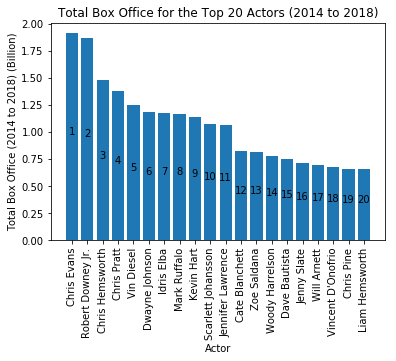

In [25]:
# Visualize the results for the top 20 actors as bar chart
bars = plt.bar(df_conclusion_sorted_for_plot.index, df_conclusion_sorted_for_plot["total_box_office_2014_to_2018"] / 1e9)
plt.xticks(rotation='vertical')
plt.xlabel("Actor")
plt.ylabel("Total Box Office (2014 to 2018) (Billion)")
plt.title("Total Box Office for the Top 20 Actors (2014 to 2018)")

counter = 1
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2.0, f"{counter}", ha='center', va='bottom')
    counter += 1

plt.savefig(os.getcwd() + "/images/total_bo_top20_actors.png", bbox_inches='tight')
plt.show()

In [26]:
# Now let's do the same BoxOffice analysis on directors
for i in range(0, len(year_list)):
    dict_temp = {}
    for row in range(0, len(movie_df_list[i])):
        director_names = movie_df_list[i]["Director"][row].split(",")
        for name in director_names:
            name = name.strip()
            if name not in dict_temp.keys():
                dict_temp[name] = {f"master_pieces_{year_list[i]}": [], f"box_office_{year_list[i]}": []}
                dict_temp[name][f"master_pieces_{year_list[i]}"].append(movie_df_list[i]["Title"][row])
                dict_temp[name][f"box_office_{year_list[i]}"].append(movie_df_list[i]["BoxOffice"][row])
            else:
                dict_temp[name][f"master_pieces_{year_list[i]}"].append(movie_df_list[i]["Title"][row])
                dict_temp[name][f"box_office_{year_list[i]}"].append(movie_df_list[i]["BoxOffice"][row])
    #locals()[f"actor_bo_dict_{year_list[i]}"] = dict_temp
    locals()[f"director_bo_df_{year_list[i]}"] = pd.DataFrame.from_dict(dict_temp, orient='index')

In [27]:
director_bo_df_2018.index.name = "director_name"
director_bo_df_2017.index.name = "director_name"
director_bo_df_2016.index.name = "director_name"
director_bo_df_2015.index.name = "director_name"
director_bo_df_2014.index.name = "director_name"

In [28]:
director_bo_df_2018.head(10)

,master_pieces_2018,box_office_2018
director_name,,
Adam Robitel,[Insidious: The Last Key],"[$29,581,355]"
Agnieszka Holland,[In Darkness],"[$1,038,733]"
Alex Garland,[Annihilation],"[$20,636,742]"
Andrei Tarkovsky,[Nostalgia],"[$5,233]"
Anthony Russo,[Avengers: Infinity War],"[$664,987,816]"
Bethany Ashton Wolf,[Forever My Girl],"[$16,174,498]"
Bruce Macdonald,[Samson],"[$4,436,089]"
Christian Gudegast,[Den of Thieves],"[$44,680,327]"
Clint Eastwood,[The 15:17 to Paris],"[$35,003,216]"


In [29]:
director_bo_df_2018["total_box_office_2018"] = director_bo_df_2018["box_office_2018"].apply(total_bo_calculator)
director_bo_df_2017["total_box_office_2017"] = director_bo_df_2017["box_office_2017"].apply(total_bo_calculator)
director_bo_df_2016["total_box_office_2016"] = director_bo_df_2016["box_office_2016"].apply(total_bo_calculator)
director_bo_df_2015["total_box_office_2015"] = director_bo_df_2015["box_office_2015"].apply(total_bo_calculator)
director_bo_df_2014["total_box_office_2014"] = director_bo_df_2014["box_office_2014"].apply(total_bo_calculator)

In [30]:
director_bo_df_2018.head()

,master_pieces_2018,box_office_2018,total_box_office_2018
director_name,,,
Adam Robitel,[Insidious: The Last Key],"[$29,581,355]",29581355.0
Agnieszka Holland,[In Darkness],"[$1,038,733]",1038733.0
Alex Garland,[Annihilation],"[$20,636,742]",20636742.0
Andrei Tarkovsky,[Nostalgia],"[$5,233]",5233.0
Anthony Russo,[Avengers: Infinity War],"[$664,987,816]",664987816.0


In [31]:
# 2018 Top BoxOffice directors
df_sorted_2018 = director_bo_df_2018.sort_values(by=["total_box_office_2018"], ascending=False)
df_sorted_2018["total_box_office_2018"] = df_sorted_2018["total_box_office_2018"].map('${:,.0f}'.format)
df_sorted_2018.head(4)

,master_pieces_2018,box_office_2018,total_box_office_2018
director_name,,,
Anthony Russo,[Avengers: Infinity War],"[$664,987,816]","$664,987,816"
Joe Russo,[Avengers: Infinity War],"[$664,987,816]","$664,987,816"
Ryan Coogler,[Black Panther],"[$501,105,037]","$501,105,037"
James Cameron,[Terminator 2: Judgment Day],"[$198,116,802]","$198,116,802"


In [32]:
# 2017 Top BoxOffice directors
df_sorted_2017 = director_bo_df_2017.sort_values(by=["total_box_office_2017"], ascending=False)
df_sorted_2017["total_box_office_2017"] = df_sorted_2017["total_box_office_2017"].map('${:,.0f}'.format)
df_sorted_2017.head(3)

,master_pieces_2017,box_office_2017,total_box_office_2017
director_name,,,
Patty Jenkins,[Wonder Woman],"[$412,400,625]","$412,400,625"
Jake Kasdan,[Jumanji: Welcome to the Jungle],"[$393,201,353]","$393,201,353"
James Gunn,[Guardians of the Galaxy Vol. 2],"[$389,804,217]","$389,804,217"


In [33]:
# 2016 Top BoxOffice directors
df_sorted_2016 = director_bo_df_2016.sort_values(by=["total_box_office_2016"], ascending=False)
df_sorted_2016["total_box_office_2016"] = df_sorted_2016["total_box_office_2016"].map('${:,.0f}'.format)
df_sorted_2016.head(5)

,master_pieces_2016,box_office_2016,total_box_office_2016
director_name,,,
Gareth Edwards,[Rogue One: A Star Wars Story],"[$532,171,696]","$532,171,696"
Andrew Stanton,[Finding Dory],"[$486,292,984]","$486,292,984"
Angus MacLane(co-director),[Finding Dory],"[$486,292,984]","$486,292,984"
Anthony Russo,[Captain America: Civil War],"[$408,080,554]","$408,080,554"
Joe Russo,[Captain America: Civil War],"[$408,080,554]","$408,080,554"


In [34]:
# 2015 Top BoxOffice directors
df_sorted_2015 = director_bo_df_2015.sort_values(by=["total_box_office_2015"], ascending=False)
df_sorted_2015["total_box_office_2015"] = df_sorted_2015["total_box_office_2015"].map('${:,.0f}'.format)
df_sorted_2015.head(3)

,master_pieces_2015,box_office_2015,total_box_office_2015
director_name,,,
Colin Trevorrow,[Jurassic World],"[$528,757,749]","$528,757,749"
George Lucas,[Star Wars: Episode I - The Phantom Menace],"[$431,000,000]","$431,000,000"
Joss Whedon,[Avengers: Age of Ultron],"[$429,113,729]","$429,113,729"


In [35]:
# 2014 Top BoxOffice directors
df_sorted_2014 = director_bo_df_2014.sort_values(by=["total_box_office_2014"], ascending=False)
df_sorted_2014["total_box_office_2014"] = df_sorted_2014["total_box_office_2014"].map('${:,.0f}'.format)
df_sorted_2014.head(4)

,master_pieces_2014,box_office_2014,total_box_office_2014
director_name,,,
Christopher Miller,"[The Lego Movie, 22 Jump Street]","[$244,870,202, $154,295,930]","$399,166,132"
Phil Lord,"[The Lego Movie, 22 Jump Street]","[$244,870,202, $154,295,930]","$399,166,132"
Francis Lawrence,[The Hunger Games: Mockingjay - Part 1],"[$295,457,212]","$295,457,212"
Clint Eastwood,[American Sniper],"[$274,377,268]","$274,377,268"


In [36]:
## Compare the accumulative BoxOffice for 2014 to 2018 (Directors)
dfs = [director_bo_df_2018, director_bo_df_2017, director_bo_df_2016, director_bo_df_2015, director_bo_df_2014]
df_combined = reduce(lambda left, right: pd.merge(left, right, how="outer", on='director_name'), dfs)

df_combined["total_box_office_2018"].fillna(0, inplace=True)
df_combined["total_box_office_2017"].fillna(0, inplace=True)
df_combined["total_box_office_2016"].fillna(0, inplace=True)
df_combined["total_box_office_2015"].fillna(0, inplace=True)
df_combined["total_box_office_2014"].fillna(0, inplace=True)

df_combined.head()

,master_pieces_2018,box_office_2018,total_box_office_2018,master_pieces_2017,box_office_2017,total_box_office_2017,master_pieces_2016,box_office_2016,total_box_office_2016,master_pieces_2015,box_office_2015,total_box_office_2015,master_pieces_2014,box_office_2014,total_box_office_2014
director_name,,,,,,,,,,,,,,,
Adam Robitel,[Insidious: The Last Key],"[$29,581,355]",29581355.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
Agnieszka Holland,[In Darkness],"[$1,038,733]",1038733.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
Alex Garland,[Annihilation],"[$20,636,742]",20636742.0,NaN,NaN,0.0,NaN,NaN,0.0,[Ex Machina],"[$19,012,798]",19012798.0,NaN,NaN,0.0
Andrei Tarkovsky,[Nostalgia],"[$5,233]",5233.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0
Anthony Russo,[Avengers: Infinity War],"[$664,987,816]",664987816.0,NaN,NaN,0.0,[Captain America: Civil War],"[$408,080,554]",408080554.0,NaN,NaN,0.0,[Captain America: The Winter Soldier],"[$228,636,083]",228636083.0


In [37]:
df_combined["total_box_office_2014_to_2018"] = df_combined.loc[:, ["total_box_office_2018", "total_box_office_2017", "total_box_office_2016", 
                                                                   "total_box_office_2015", "total_box_office_2014"]].sum(axis=1)

In [38]:
df_conclusion = df_combined["total_box_office_2014_to_2018"].to_frame()
df_conclusion_sorted = df_conclusion.sort_values(by=["total_box_office_2014_to_2018"], ascending=False)
df_conclusion_sorted_for_plot = copy.deepcopy(df_conclusion_sorted.iloc[:20, :])
df_conclusion_sorted["total_box_office_2014_to_2018"] = df_conclusion_sorted["total_box_office_2014_to_2018"].map('${:,.0f}'.format)
df_conclusion_sorted.head(10)

,total_box_office_2014_to_2018
director_name,
Anthony Russo,"$1,301,704,453"
Joe Russo,"$1,301,704,453"
Gareth Edwards,"$705,134,692"
James Gunn,"$660,396,721"
Ryan Coogler,"$582,262,708"
Francis Lawrence,"$567,098,541"
Kyle Balda,"$542,164,509"
Pierre Coffin,"$542,164,509"
Colin Trevorrow,"$532,977,285"


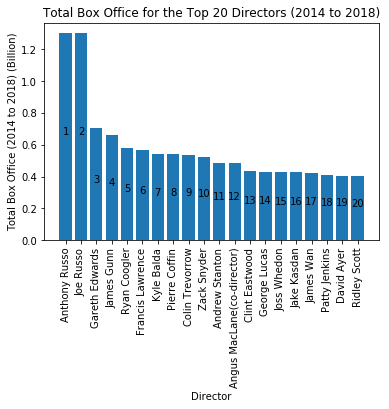

In [39]:
# Visualize the results for the top 20 directors as bar chart
bars = plt.bar(df_conclusion_sorted_for_plot.index, df_conclusion_sorted_for_plot["total_box_office_2014_to_2018"] / 1e9)
plt.xticks(rotation='vertical')
plt.xlabel("Director")
plt.ylabel("Total Box Office (2014 to 2018) (Billion)")
plt.title("Total Box Office for the Top 20 Directors (2014 to 2018)")

counter = 1
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2.0, f"{counter}", ha='center', va='bottom')
    counter += 1

plt.savefig(os.getcwd() + "/images/total_bo_top20_directors.png", bbox_inches='tight')
plt.show()

In [40]:
# Analysis on the accumulative BoxOffice of different genres of movies
for i in range(0, len(year_list)):
    dict_temp = {}
    for row in range(0, len(movie_df_list[i])):
        genre_names = movie_df_list[i]["Genre"][row].split(",")
        for name in genre_names:
            name = name.strip()
            if name not in dict_temp.keys():
                dict_temp[name] = {f"num_of_movies_{year_list[i]}": 0, f"box_office_{year_list[i]}": []}
                dict_temp[name][f"num_of_movies_{year_list[i]}"] += 1
                dict_temp[name][f"box_office_{year_list[i]}"].append(movie_df_list[i]["BoxOffice"][row])
            else:
                dict_temp[name][f"num_of_movies_{year_list[i]}"] += 1
                dict_temp[name][f"box_office_{year_list[i]}"].append(movie_df_list[i]["BoxOffice"][row])
    #locals()[f"actor_bo_dict_{year_list[i]}"] = dict_temp
    locals()[f"genre_bo_df_{year_list[i]}"] = pd.DataFrame.from_dict(dict_temp, orient='index')

In [41]:
genre_bo_df_2018.index.name = "genre"
genre_bo_df_2017.index.name = "genre"
genre_bo_df_2016.index.name = "genre"
genre_bo_df_2015.index.name = "genre"
genre_bo_df_2014.index.name = "genre"

In [42]:
genre_bo_df_2018.head()

,num_of_movies_2018,box_office_2018
genre,,
Action,10,"[$36,241,300, $44,680,327, $501,105,037, $4,43..."
Adventure,5,"[$84,060,376, $501,105,037, $20,636,742, $664,..."
Animation,1,"[$84,060,376]"
Biography,3,"[$24,553,838, $35,003,216, $809,724]"
Comedy,3,"[$84,060,376, $2,675,608, $33,537,766]"


In [43]:
genre_bo_df_2018["total_box_office_2018"] = genre_bo_df_2018["box_office_2018"].apply(total_bo_calculator)
genre_bo_df_2017["total_box_office_2017"] = genre_bo_df_2017["box_office_2017"].apply(total_bo_calculator)
genre_bo_df_2016["total_box_office_2016"] = genre_bo_df_2016["box_office_2016"].apply(total_bo_calculator)
genre_bo_df_2015["total_box_office_2015"] = genre_bo_df_2015["box_office_2015"].apply(total_bo_calculator)
genre_bo_df_2014["total_box_office_2014"] = genre_bo_df_2014["box_office_2014"].apply(total_bo_calculator)

In [44]:
genre_bo_df_2018.head()

,num_of_movies_2018,box_office_2018,total_box_office_2018
genre,,,
Action,10,"[$36,241,300, $44,680,327, $501,105,037, $4,43...",1.618350e+09
Adventure,5,"[$84,060,376, $501,105,037, $20,636,742, $664,...",1.376010e+09
Animation,1,"[$84,060,376]",8.406038e+07
Biography,3,"[$24,553,838, $35,003,216, $809,724]",6.036678e+07
Comedy,3,"[$84,060,376, $2,675,608, $33,537,766]",1.202738e+08


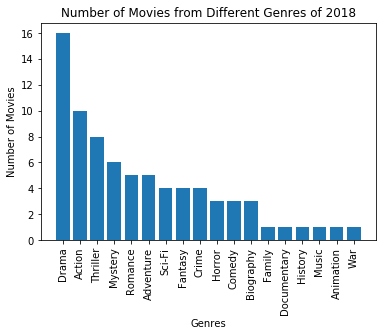

In [45]:
## Generate bar charts

# For 2018
df_num_sorted_2018 = genre_bo_df_2018.sort_values(by=["num_of_movies_2018"], ascending=False)
plt.bar(df_num_sorted_2018.index, df_num_sorted_2018["num_of_movies_2018"])
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Number of Movies from Different Genres of 2018")
plt.savefig(os.getcwd() + "/images/genre_plot_2018_1.png", bbox_inches='tight')
plt.show()

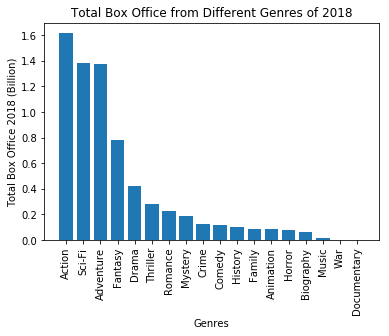

In [46]:
df_bo_sorted_2018 = genre_bo_df_2018.sort_values(by=["total_box_office_2018"], ascending=False)
plt.bar(df_bo_sorted_2018.index, df_bo_sorted_2018["total_box_office_2018"] / 1e9)
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Total Box Office 2018 (Billion)")
plt.title("Total Box Office from Different Genres of 2018")
plt.savefig(os.getcwd() + "/images/genre_plot_2018_2.png", bbox_inches='tight')
plt.show()

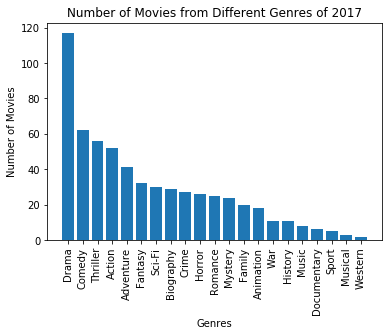

In [47]:
# For 2017
df_num_sorted_2017 = genre_bo_df_2017.sort_values(by=["num_of_movies_2017"], ascending=False)
plt.bar(df_num_sorted_2017.index, df_num_sorted_2017["num_of_movies_2017"])
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Number of Movies from Different Genres of 2017")
plt.savefig(os.getcwd() + "/images/genre_plot_2017_1.png", bbox_inches='tight')
plt.show()

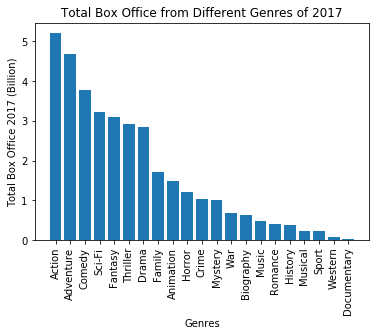

In [48]:
df_bo_sorted_2017 = genre_bo_df_2017.sort_values(by=["total_box_office_2017"], ascending=False)
plt.bar(df_bo_sorted_2017.index, df_bo_sorted_2017["total_box_office_2017"] / 1e9)
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Total Box Office 2017 (Billion)")
plt.title("Total Box Office from Different Genres of 2017")
plt.savefig(os.getcwd() + "/images/genre_plot_2017_2.png", bbox_inches='tight')
plt.show()

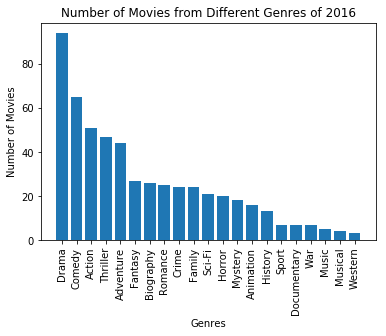

In [49]:
# For 2016
df_num_sorted_2016 = genre_bo_df_2016.sort_values(by=["num_of_movies_2016"], ascending=False)
plt.bar(df_num_sorted_2016.index, df_num_sorted_2016["num_of_movies_2016"])
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Number of Movies from Different Genres of 2016")
plt.savefig(os.getcwd() + "/images/genre_plot_2016_1.png", bbox_inches='tight')
plt.show()

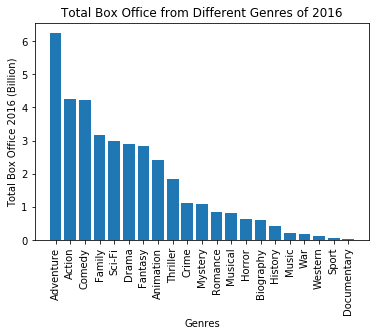

In [50]:
df_bo_sorted_2016 = genre_bo_df_2016.sort_values(by=["total_box_office_2016"], ascending=False)
plt.bar(df_bo_sorted_2016.index, df_bo_sorted_2016["total_box_office_2016"] / 1e9)
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Total Box Office 2016 (Billion)")
plt.title("Total Box Office from Different Genres of 2016")
plt.savefig(os.getcwd() + "/images/genre_plot_2016_2.png", bbox_inches='tight')
plt.show()

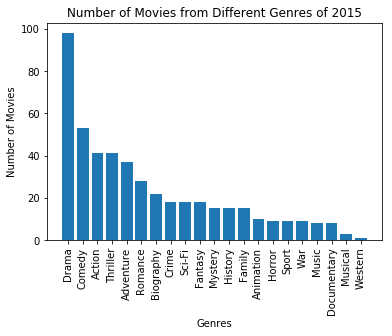

In [51]:
# For 2015
df_num_sorted_2015 = genre_bo_df_2015.sort_values(by=["num_of_movies_2015"], ascending=False)
plt.bar(df_num_sorted_2015.index, df_num_sorted_2015["num_of_movies_2015"])
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Number of Movies from Different Genres of 2015")
plt.savefig(os.getcwd() + "/images/genre_plot_2015_1.png", bbox_inches='tight')
plt.show()

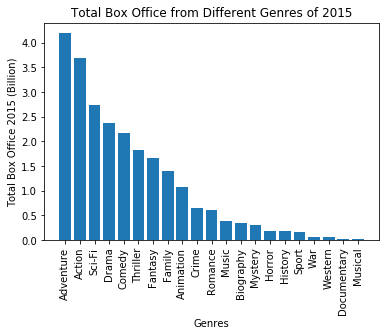

In [52]:
df_bo_sorted_2015 = genre_bo_df_2015.sort_values(by=["total_box_office_2015"], ascending=False)
plt.bar(df_bo_sorted_2015.index, df_bo_sorted_2015["total_box_office_2015"] / 1e9)
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Total Box Office 2015 (Billion)")
plt.title("Total Box Office from Different Genres of 2015")
plt.savefig(os.getcwd() + "/images/genre_plot_2015_2.png", bbox_inches='tight')
plt.show()

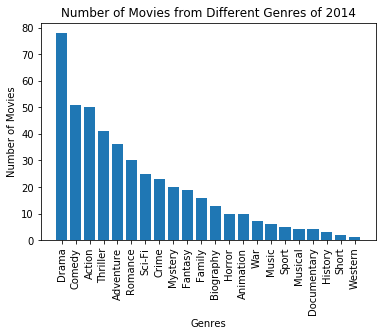

In [53]:
# For 2014
df_num_sorted_2014 = genre_bo_df_2014.sort_values(by=["num_of_movies_2014"], ascending=False)
plt.bar(df_num_sorted_2014.index, df_num_sorted_2014["num_of_movies_2014"])
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.title("Number of Movies from Different Genres of 2014")
plt.savefig(os.getcwd() + "/images/genre_plot_2014_1.png", bbox_inches='tight')
plt.show()

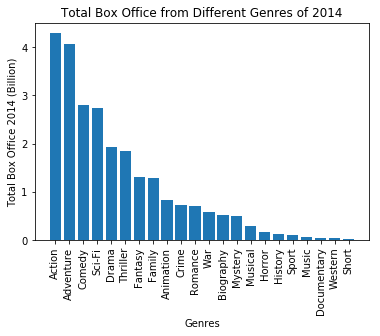

In [54]:
df_bo_sorted_2014 = genre_bo_df_2014.sort_values(by=["total_box_office_2014"], ascending=False)
plt.bar(df_bo_sorted_2014.index, df_bo_sorted_2014["total_box_office_2014"] / 1e9)
plt.xticks(rotation='vertical')
plt.xlabel("Genres")
plt.ylabel("Total Box Office 2014 (Billion)")
plt.title("Total Box Office from Different Genres of 2014")
plt.savefig(os.getcwd() + "/images/genre_plot_2014_2.png", bbox_inches='tight')
plt.show()

In [55]:
# Let's check the total number of movies from different genres and their total box office from 2014 to 2018
dfs = [genre_bo_df_2018, genre_bo_df_2017, genre_bo_df_2016, genre_bo_df_2015, genre_bo_df_2014]
df_combined = reduce(lambda left, right: pd.merge(left, right, how="outer", on='genre'), dfs)

df_combined["total_box_office_2018"].fillna(0, inplace=True)
df_combined["total_box_office_2017"].fillna(0, inplace=True)
df_combined["total_box_office_2016"].fillna(0, inplace=True)
df_combined["total_box_office_2015"].fillna(0, inplace=True)
df_combined["total_box_office_2014"].fillna(0, inplace=True)

df_combined.head()

,num_of_movies_2018,box_office_2018,total_box_office_2018,num_of_movies_2017,box_office_2017,total_box_office_2017,num_of_movies_2016,box_office_2016,total_box_office_2016,num_of_movies_2015,box_office_2015,total_box_office_2015,num_of_movies_2014,box_office_2014,total_box_office_2014
genre,,,,,,,,,,,,,,,
Action,10.0,"[$36,241,300, $44,680,327, $501,105,037, $4,43...",1.618350e+09,52.0,"[$30,348,260, $33,243,820, $20,757,977, $44,85...",5.208137e+09,51.0,"[$181,609, $128,341,070, $21,074, $1,149,878, ...",4.264089e+09,41.0,"[$5,686,515, $431,000,000, $6,847,536, $43,733...",3.690332e+09,50,"[$14,739,982, $3,453, $43,003,831, $37,911,876...",4.293724e+09
Adventure,5.0,"[$84,060,376, $501,105,037, $20,636,742, $664,...",1.376010e+09,41.0,"[$30,348,260, $33,243,820, $44,850,317, $64,30...",4.668936e+09,44.0,"[$12,320,716, $128,341,070, $21,074, $328,674,...",6.245010e+09,37.0,"[$431,000,000, $10,201,634, $19,189,413, $43,7...",4.196454e+09,36,"[$14,739,982, $244,870,202, $56,939,515, $101,...",4.071324e+09
Animation,1.0,"[$84,060,376]",8.406038e+07,18.0,"[$920,057, $175,686,290, $47,611,331, $174,996...",1.477640e+09,16.0,"[$12,320,716, $128,341,070, $341,264,012, $107...",2.423357e+09,10.0,"[$10,201,634, $157,801,252, $264,317,903, $277...",1.072876e+09,10,"[$244,870,202, $101,784,999, $47,611,331, $113...",8.236179e+08
Biography,3.0,"[$24,553,838, $35,003,216, $809,724]",6.036678e+07,29.0,"[$3,901,302, $17,407,536, $14,678,714, $8,554,...",6.271766e+08,26.0,"[$181,609, $14,319,394, $20,047,049, $18,356,5...",6.181946e+08,22.0,"[$694,600, $19,189,413, $91,220, $4,242,318, $...",3.550665e+08,13,"[$347,321, $46,305,287, $10,675,739, $9,744,47...",5.151975e+08
Comedy,3.0,"[$84,060,376, $2,675,608, $33,537,766]",1.202738e+08,62.0,"[$33,243,820, $42,824,653, $64,304,940, $14,86...",3.783523e+09,65.0,"[$12,320,716, $128,341,070, $34,690,808, $21,0...",4.221669e+09,53.0,"[$6,847,536, $10,201,634, $19,189,413, $11,674...",2.165606e+09,51,"[$37,911,876, $110,374,905, $1,587,655, $23,26...",2.797129e+09


In [56]:
df_combined["total_num_of_movies_2014_to_2018"] = df_combined.loc[:, ["num_of_movies_2018", "num_of_movies_2017", "num_of_movies_2016", 
                                                                   "num_of_movies_2015", "num_of_movies_2014"]].sum(axis=1)

In [57]:
df_combined["total_box_office_2014_to_2018"] = df_combined.loc[:, ["total_box_office_2018", "total_box_office_2017", "total_box_office_2016", 
                                                                   "total_box_office_2015", "total_box_office_2014"]].sum(axis=1)

In [58]:
df_conclusion = df_combined.loc[:, ["total_num_of_movies_2014_to_2018", "total_box_office_2014_to_2018"]]
df_conclusion.head()

,total_num_of_movies_2014_to_2018,total_box_office_2014_to_2018
genre,,
Action,204.0,1.907463e+10
Adventure,163.0,2.055773e+10
Animation,55.0,5.881551e+09
Biography,93.0,2.176002e+09
Comedy,234.0,1.308820e+10


In [59]:
df_conclusion_num = df_conclusion["total_num_of_movies_2014_to_2018"].to_frame()
df_conclusion_num_sorted = df_conclusion_num.sort_values(by=["total_num_of_movies_2014_to_2018"], ascending=False)
df_conclusion_num_sorted_for_plot = copy.deepcopy(df_conclusion_num_sorted)
df_conclusion_num_sorted["total_num_of_movies_2014_to_2018"] = df_conclusion_num_sorted["total_num_of_movies_2014_to_2018"].map('{:,.0f}'.format)
df_conclusion_num_sorted.head(10)

,total_num_of_movies_2014_to_2018
genre,
Drama,403
Comedy,234
Action,204
Thriller,193
Adventure,163
Romance,113
Fantasy,100
Sci-Fi,98
Crime,96


In [60]:
df_conclusion_bo = df_conclusion["total_box_office_2014_to_2018"].to_frame()
df_conclusion_bo_sorted = df_conclusion_bo.sort_values(by=["total_box_office_2014_to_2018"], ascending=False)
df_conclusion_bo_sorted_for_plot = copy.deepcopy(df_conclusion_bo_sorted)
df_conclusion_bo_sorted["total_box_office_2014_to_2018"] = df_conclusion_bo_sorted["total_box_office_2014_to_2018"].map('${:,.0f}'.format)
df_conclusion_bo_sorted.head(10)

,total_box_office_2014_to_2018
genre,
Adventure,"$20,557,733,333"
Action,"$19,074,631,595"
Comedy,"$13,088,200,619"
Sci-Fi,"$13,067,497,345"
Drama,"$10,440,192,152"
Fantasy,"$9,680,372,013"
Thriller,"$8,715,156,219"
Family,"$7,659,144,069"
Animation,"$5,881,551,206"


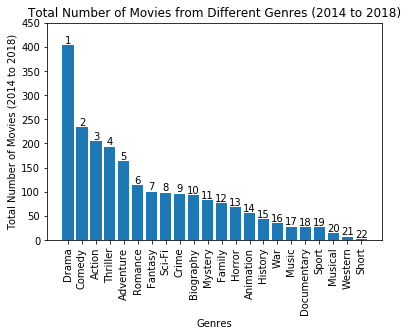

In [61]:
# Let's generate bar charts to visualize the above results
bars = plt.bar(df_conclusion_num_sorted_for_plot.index, df_conclusion_num_sorted_for_plot["total_num_of_movies_2014_to_2018"])
plt.xticks(rotation='vertical')
plt.ylim((0, 450))
plt.xlabel("Genres")
plt.ylabel("Total Number of Movies (2014 to 2018)")
plt.title("Total Number of Movies from Different Genres (2014 to 2018)")

counter = 1
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{counter}", ha='center', va='bottom')
    counter += 1

plt.savefig(os.getcwd() + "/images/genre_total_plot_1.png", bbox_inches='tight')
plt.show()

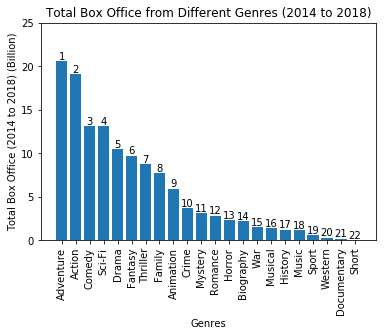

In [62]:
bars = plt.bar(df_conclusion_bo_sorted_for_plot.index, df_conclusion_bo_sorted_for_plot["total_box_office_2014_to_2018"] / 1e9)
plt.xticks(rotation='vertical')
plt.ylim((0, 25))
plt.xlabel("Genres")
plt.ylabel("Total Box Office (2014 to 2018) (Billion)")
plt.title("Total Box Office from Different Genres (2014 to 2018)")

counter = 1
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{counter}", ha='center', va='bottom')
    counter += 1

plt.savefig(os.getcwd() + "/images/genre_total_plot_2.png", bbox_inches='tight')
plt.show()

In [63]:
# Let's check the average Box Office for different genres
df_conclusion["avg_box_office_per_movie"] = df_conclusion["total_box_office_2014_to_2018"] / df_conclusion["total_num_of_movies_2014_to_2018"]
df_conclusion.head()

,total_num_of_movies_2014_to_2018,total_box_office_2014_to_2018,avg_box_office_per_movie
genre,,,
Action,204.0,1.907463e+10,9.350310e+07
Adventure,163.0,2.055773e+10,1.261211e+08
Animation,55.0,5.881551e+09,1.069373e+08
Biography,93.0,2.176002e+09,2.339787e+07
Comedy,234.0,1.308820e+10,5.593248e+07


In [64]:
df_conclusion_avg_bo = df_conclusion["avg_box_office_per_movie"].to_frame()
df_conclusion_avg_bo_sorted = df_conclusion_avg_bo.sort_values(by=["avg_box_office_per_movie"], ascending=False)
df_conclusion_avg_bo_sorted_for_plot = copy.deepcopy(df_conclusion_avg_bo_sorted)
df_conclusion_avg_bo_sorted["avg_box_office_per_movie"] = df_conclusion_avg_bo_sorted["avg_box_office_per_movie"].map('${:,.0f}'.format)
df_conclusion_avg_bo_sorted.head(10)

,avg_box_office_per_movie
genre,
Sci-Fi,"$133,341,810"
Adventure,"$126,121,063"
Animation,"$106,937,295"
Family,"$100,778,211"
Musical,"$97,963,849"
Fantasy,"$96,803,720"
Action,"$93,503,096"
Comedy,"$55,932,481"
Thriller,"$45,156,250"


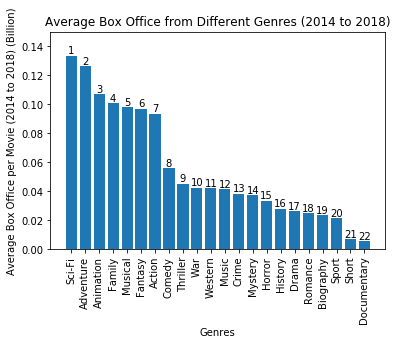

In [65]:
# Let's generate bar charts for the above results
bars = plt.bar(df_conclusion_avg_bo_sorted_for_plot.index, df_conclusion_avg_bo_sorted_for_plot["avg_box_office_per_movie"] / 1e9)
plt.xticks(rotation='vertical')
plt.ylim((0, 0.15))
plt.xlabel("Genres")
plt.ylabel("Average Box Office per Movie (2014 to 2018) (Billion)")
plt.title("Average Box Office from Different Genres (2014 to 2018)")

counter = 1
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{counter}", ha='center', va='bottom')
    counter += 1

plt.savefig(os.getcwd() + "/images/genre_total_plot_3.png", bbox_inches='tight')
plt.show()

In [66]:
def str_to_float(num):
    num = num.replace("$", "")
    num = num.replace(",", "")
    num = float(num)
    return num 

In [67]:
# Next, let's compare the total Box Office from 2014 to 2018
# 2018 data is eliminated from the comparison due the lack of enough samples
total_bo_list = []
for df in reversed(movie_df_list[1:]):
    total_bo = df["BoxOffice"].apply(str_to_float).sum()
    total_bo_list.append(total_bo)

total_bo_list   

[7030233037.0, 6718216875.0, 9979729977.0, 9431162908.0]

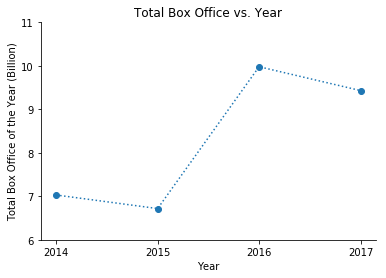

In [68]:
# Generate plot
fig, ax = plt.subplots()
x_axis = np.arange(2014, 2018)
plt.plot(x_axis, np.array(total_bo_list) / 1e9, ":o")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)
plt.ylim((6, 11))
plt.xlabel("Year")
plt.ylabel("Total Box Office of the Year (Billion)")
plt.title("Total Box Office vs. Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(os.getcwd() + "/images/total_bo_plot.png", bbox_inches='tight')
plt.show()

In [69]:
# Next, let's check the average Box Office from 2014 to 2018
avg_bo_list = []
for df in reversed(movie_df_list[1:]):
    avg_bo = df["BoxOffice"].apply(str_to_float).sum() / len(df)
    avg_bo_list.append(avg_bo)

avg_bo_list

[47501574.574324325, 42252936.320754714, 58360994.01754386, 48118178.10204082]

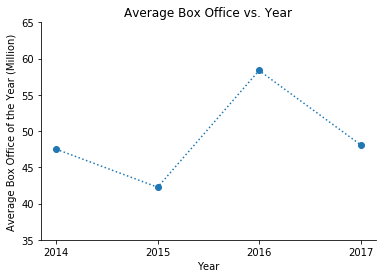

In [70]:
# Generate plot
fig, ax = plt.subplots()
x_axis = np.arange(2014, 2018)
plt.plot(x_axis, np.array(avg_bo_list) / 1e6, ":o")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)
plt.ylim((35, 65))
plt.xlabel("Year")
plt.ylabel("Average Box Office of the Year (Million)")
plt.title("Average Box Office vs. Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(os.getcwd() + "/images/avg_bo_plot.png", bbox_inches='tight')
plt.show()

In [71]:
# Finally, let's check the average ratings of the movies from 2014 to 2018
rating_list = []

for df in reversed(movie_df_list):
    rating_dict = {
        "Internet Movie Database": [],
        "Rotten Tomatoes": [],
        "Metacritic": [],
    }
    for i in range(len(df)):
        j_str = df["Ratings"][i]
        new_j_str = j_str.replace('\'', '\"')
        df_rating_list = json.loads(new_j_str)
        for rating in df_rating_list:
            org_name = rating["Source"]
            score = rating["Value"]
            rating_dict[org_name].append(score)
    
    rating_list.append(rating_dict)
        

In [72]:
rating_list_num = []

for item in rating_list:
    new_dict = {}
    
    imdb_list = item["Internet Movie Database"]
    new_imdb_list = [float(x.split("/")[0]) for x in imdb_list]
    new_dict["Internet Movie Database"] = new_imdb_list
    
    rt_list = item["Rotten Tomatoes"]
    new_rt_list = []
    for x in rt_list:
        new_x = x.replace("%", "")
        new_rt_list.append(float(new_x))
    new_dict["Rotten Tomatoes"] = new_rt_list
    
    metacritic_list = item["Metacritic"]
    new_metacritic_list = [float(x.split("/")[0]) for x in metacritic_list]
    new_dict["Metacritic"] = new_metacritic_list
    
    rating_list_num.append(new_dict)   

In [73]:
avg_rating_dict = {
    "Internet Movie Database": [],
    "Rotten Tomatoes": [],
    "Metacritic": [],
}

for item in rating_list_num:
    for key in avg_rating_dict.keys():
        avg_rating_dict[key].append(sum(item[key]) / len(item[key]))

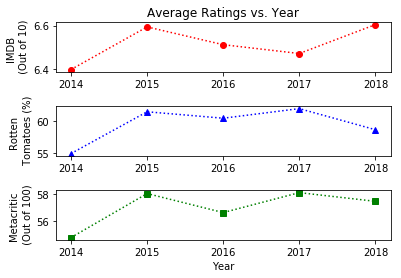

In [74]:
# Now let's generate the plots
color_list = ["r", "b", "g"]
fmt_list = ["o", "^", "s"]
plt.figure()
x_axis = np.arange(2014, 2019)
counter = 0
for key in avg_rating_dict.keys():
    plt.subplot(len(avg_rating_dict.keys()), 1, counter + 1)
    plt.plot(x_axis, avg_rating_dict[key], color_list[counter] + ":" + fmt_list[counter])
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, x_axis)
    if counter == 0:
        plt.ylabel("IMDB \n (Out of 10)")
        plt.title("Average Ratings vs. Year")
    elif counter == 1:
        plt.ylabel(f"Rotten \n Tomatoes (%)")
    else:
        plt.xlabel("Year")
        plt.ylabel(f"{key} \n (Out of 100)")
    counter += 1
    
plt.subplots_adjust(hspace=0.7)
plt.savefig(os.getcwd() + "/images/avg_rating_plot.png", bbox_inches='tight')
plt.show()

In [75]:
# Finally, let's take an analysis in terms of movies, say let's find out the top 20 movies with the highest Box Office form 2014 to 2018
df_concat = pd.concat(movie_df_list, axis=0, ignore_index=True)

In [76]:
df_concat.shape

(698, 25)

In [77]:
df_concat_copy = copy.deepcopy(df_concat)
df_concat_copy["BoxOffice"] = df_concat_copy["BoxOffice"].apply(str_to_float)

In [78]:
df_concat_copy_sorted = df_concat_copy.sort_values(by=["BoxOffice"], ascending=False)
df_concat_copy_sorted = df_concat_copy_sorted.reset_index(drop=True)
df_concat_copy_sorted.index += 1
df_concat_copy_sorted.index.name = "Rank"

In [79]:
df_concat_copy_sorted.head(10)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
Rank,,,,,,,,,,,,,,,,,,,,,,,,,
1,Avengers: Infinity War,2018,PG-13,27 Apr 2018,149 min,"Action, Adventure, Fantasy, Sci-Fi","Anthony Russo, Joe Russo","Christopher Markus (screenplay by), Stephen Mc...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",The Avengers and their allies must be willing ...,English,USA,NaN,https://m.media-amazon.com/images/M/MV5BMjMxNj...,"[{'Source': 'Internet Movie Database', 'Value'...",68.0,8.5,"592,755",tt4154756,movie,14 Aug 2018,664987816.0,Walt Disney Pictures,http://marvel.com/movies/movie/223/avengers_in...,True
2,Rogue One: A Star Wars Story,2016,PG-13,16 Dec 2016,133 min,"Action, Adventure, Sci-Fi",Gareth Edwards,"Chris Weitz (screenplay by), Tony Gilroy (scre...","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",The daughter of an Imperial scientist joins th...,English,USA,Nominated for 2 Oscars. Another 23 wins & 78 n...,https://m.media-amazon.com/images/M/MV5BMjEwMz...,"[{'Source': 'Internet Movie Database', 'Value'...",65.0,7.8,"463,104",tt3748528,movie,04 Apr 2017,532171696.0,Walt Disney Pictures,http://www.starwars.com/,True
3,Jurassic World,2015,PG-13,12 Jun 2015,124 min,"Action, Adventure, Sci-Fi",Colin Trevorrow,"Rick Jaffa (screenplay by), Amanda Silver (scr...","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...","A new theme park, built on the original site o...",English,USA,14 wins & 57 nominations.,https://m.media-amazon.com/images/M/MV5BNzQ3OT...,"[{'Source': 'Internet Movie Database', 'Value'...",59.0,7.0,"528,787",tt0369610,movie,20 Oct 2015,528757749.0,Universal Pictures,http://www.jurassicworldmovie.com/,True
4,Black Panther,2018,PG-13,16 Feb 2018,134 min,"Action, Adventure, Sci-Fi",Ryan Coogler,"Ryan Coogler, Joe Robert Cole, Stan Lee (based...","Chadwick Boseman, Michael B. Jordan, Lupita Ny...","T'Challa, heir to the hidden but advanced king...","English, Swahili, Nama, Xhosa, Korean",USA,14 nominations.,https://m.media-amazon.com/images/M/MV5BMTg1MT...,"[{'Source': 'Internet Movie Database', 'Value'...",88.0,7.3,"469,075",tt1825683,movie,15 May 2018,501105037.0,Marvel Studios,https://www.marvel.com/movies/black-panther,True
5,Finding Dory,2016,PG,17 Jun 2016,97 min,"Animation, Adventure, Comedy, Family","Andrew Stanton, Angus MacLane(co-director)","Andrew Stanton (original story by), Andrew Sta...","Ellen DeGeneres, Albert Brooks, Ed O'Neill, Ka...","The friendly but forgetful blue tang fish, Dor...","English, Indonesian",USA,Nominated for 1 BAFTA Film Award. Another 15 w...,https://m.media-amazon.com/images/M/MV5BNzg4Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",77.0,7.3,"208,366",tt2277860,movie,15 Nov 2016,486292984.0,Walt Disney Pictures/PIXAR,http://movies.disney.com/finding-dory,True
6,Star Wars: Episode I - The Phantom Menace,1999,PG,19 May 1999,136 min,"Action, Adventure, Fantasy, Sci-Fi",George Lucas,George Lucas,"Liam Neeson, Ewan McGregor, Natalie Portman, J...",Two Jedi Knights escape a hostile blockade to ...,English,USA,Nominated for 3 Oscars. Another 26 wins & 65 n...,https://m.media-amazon.com/images/M/MV5BYTRhNj...,"[{'Source': 'Internet Movie Database', 'Value'...",51.0,6.5,"643,199",tt0120915,movie,16 Oct 2001,431000000.0,20th Century Fox,http://www.starwars.com/episode-i/,True
7,Avengers: Age of Ultron,2015,PG-13,01 May 2015,141 min,"Action, Adventure, Sci-Fi",Joss Whedon,"Joss Whedon, Stan Lee (based on the Marvel com...","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",When Tony Stark and Bruce Banner try to jump-s...,"English, Korean",USA,7 wins & 45 nominations.,https://m.media-amazon.com/images/M/MV5BMTM4OG...,"[{'Source': 'Internet Movie Database', 'Value'...",66.0,7.4,"627,597",tt2395427,movie,02 Oct 2015,429113729.0,Walt Disney Pictures,http://marvel.com/avengers,True
8,Wonder Woman,2017,PG-13,02 Jun 2017,141 min,"Action, Adventure

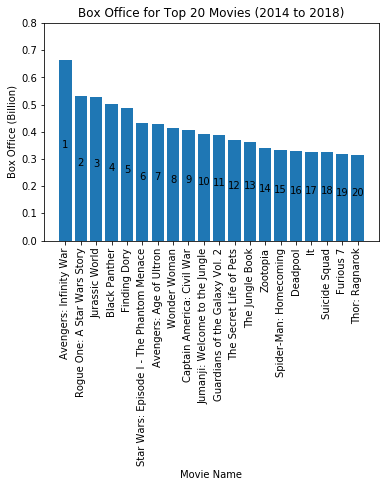

In [80]:
# Finally, let's generate a bar chart to visualize the top 20 best Box Office movies from 2014 to 2018
bars = plt.bar(df_concat_copy_sorted["Title"][:20], df_concat_copy_sorted["BoxOffice"][:20] / 1e9)
plt.xticks(rotation='vertical')
plt.xlabel("Movie Name")
plt.ylabel("Box Office (Billion)")
plt.ylim((0, 0.8))
plt.title("Box Office for Top 20 Movies (2014 to 2018)")

counter = 1
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2.0, f"{counter}", ha='center', va='bottom')
    counter += 1

plt.savefig(os.getcwd() + "/images/bo_top20_movies.png", bbox_inches='tight')
plt.show()